In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_path = '/content/drive/MyDrive/MusicGeneration/dataset/data/other/miscellaneous/'

In [ ]:
!pip install np_utils
!pip install pretty_midi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/



 25%|██▌       | 443/1764 [01:11<00:34, 38.65it/s]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from music21 import converter, instrument, note, stream, chord
import os
from pathlib import Path
import numpy as np
from keras.utils import np_utils
from keras import Sequential
from keras.layers import LSTM, Dropout, Dense, Activation
from keras.callbacks import ModelCheckpoint
import pretty_midi

In [ ]:
def get_files(path):
  fs = []
  files = Path(path).rglob('*.mid')
  for f in files:
    path = f.resolve()
    print(path)
    fs.append(str(path))
  return fs

In [ ]:
import re
def get_notes(file):
  # print(file)
  notes = []
  inst = ['Right Hand', 'RHS', 'Harpsichord']
  try:
    mf = pretty_midi.PrettyMIDI(file)
    pattern = re.compile("((.*[P|p])iano(.*))|((.*[M|m])elody(.*))|((.*[O|o])rgan(.*))")
    npat = re.compile("(.*[L|l])eft(.*)")
    insts = []
    for i in mf.instruments:
      if not npat.match(i.name) and ((i.name in inst) or pattern.match(i.name)):
        insts.append(i)
    for instrument in insts:
      # print(instrument.name)
      prev_note = instrument.notes[0]
      tmp = str(prev_note.pitch)
      for note in instrument.notes[1:]:
        if(prev_note.start == note.start):
          tmp += '.' + str(note.pitch)
        else:
          notes.append(tmp)
          tmp = str(note.pitch)
        prev_note = note
        notes.append(tmp)
  except Exception as error:
    print(error)
  return np.array(notes)

In [ ]:
music_files = get_files(data_path)
print(len(music_files))
print(music_files)

/content/drive/.shortcut-targets-by-id/11cKJ7xRK4dAJccl6LRAYNGYKhfXwZxbe/MusicGeneration/dataset/data/other/miscellaneous/piano/Chrono Trigger/ChronoTrigger.mid
/content/drive/.shortcut-targets-by-id/11cKJ7xRK4dAJccl6LRAYNGYKhfXwZxbe/MusicGeneration/dataset/data/other/miscellaneous/piano/Chrono Trigger/Chrono_Trigger_1000_ad.mid
/content/drive/.shortcut-targets-by-id/11cKJ7xRK4dAJccl6LRAYNGYKhfXwZxbe/MusicGeneration/dataset/data/other/miscellaneous/piano/Chrono Trigger/corridor.mid
/content/drive/.shortcut-targets-by-id/11cKJ7xRK4dAJccl6LRAYNGYKhfXwZxbe/MusicGeneration/dataset/data/other/miscellaneous/piano/Chrono Trigger/magustheme-piano.mid
/content/drive/.shortcut-targets-by-id/11cKJ7xRK4dAJccl6LRAYNGYKhfXwZxbe/MusicGeneration/dataset/data/other/miscellaneous/piano/Chrono Trigger/BlueStone_MillenialFair.mid
/content/drive/.shortcut-targets-by-id/11cKJ7xRK4dAJccl6LRAYNGYKhfXwZxbe/MusicGeneration/dataset/data/other/miscellaneous/piano/Chrono Trigger/Ctoceanp.mid
/content/drive/.shortc

In [ ]:
from tqdm import tqdm
notes_array = [get_notes(i) for i in tqdm(music_files) if i]



  0%|          | 0/1991 [00:00<?, ?it/s]

  0%|          | 1/1991 [00:00<03:59,  8.31it/s]

  0%|          | 4/1991 [00:00<01:40, 19.87it/s]

  0%|          | 9/1991 [00:00<01:09, 28.43it/s]

  1%|          | 14/1991 [00:00<00:59, 33.18it/s]

  1%|          | 18/1991 [00:00<00:55, 35.26it/s]

  1%|          | 23/1991 [00:00<00:52, 37.26it/s]

  1%|▏         | 27/1991 [00:00<00:53, 36.71it/s]

  2%|▏         | 31/1991 [00:01<01:07, 29.18it/s]

  2%|▏         | 35/1991 [00:01<01:31, 21.31it/s]

  2%|▏         | 38/1991 [00:01<01:34, 20.71it/s]

  2%|▏         | 41/1991 [00:01<01:36, 20.11it/s]

  2%|▏         | 45/1991 [00:01<01:45, 18.40it/s]

  2%|▏         | 48/1991 [00:02<01:38, 19.73it/s]

  3%|▎         | 51/1991 [00:02<01:44, 18.56it/s]

  3%|▎         | 54/1991 [00:02<01:37, 19.95it/s]

  7%|▋         | 127/1764 [01:48<23:24,  1.17it/s]


  3%|▎         | 61/1991 [00:03<02:38, 12.16it/s]

  3%|▎         | 65/1991 [00:03<02:04, 15.45it/s]

  3%|▎         | 68/1991 [00:03<02:15, 

data byte must be in range 0..127


 11%|█         | 221/1991 [00:13<01:12, 24.47it/s]

 11%|█▏        | 224/1991 [00:13<01:36, 18.36it/s]

 12%|█▏        | 229/1991 [00:13<01:15, 23.23it/s]

 12%|█▏        | 232/1991 [00:14<01:15, 23.44it/s]

 12%|█▏        | 235/1991 [00:14<01:13, 24.01it/s]

 12%|█▏        | 238/1991 [00:14<01:14, 23.43it/s]

 12%|█▏        | 241/1991 [00:14<02:02, 14.32it/s]

 12%|█▏        | 243/1991 [00:14<02:08, 13.64it/s]

 12%|█▏        | 245/1991 [00:15<02:11, 13.30it/s]

 12%|█▏        | 247/1991 [00:15<02:14, 12.93it/s]

 13%|█▎        | 249/1991 [00:15<02:33, 11.33it/s]

 13%|█▎        | 252/1991 [00:15<02:08, 13.48it/s]

 13%|█▎        | 254/1991 [00:15<02:10, 13.36it/s]

 13%|█▎        | 256/1991 [00:15<02:00, 14.38it/s]

 13%|█▎        | 258/1991 [00:16<02:04, 13.95it/s]

 13%|█▎        | 260/1991 [00:16<01:58, 14.55it/s]

 13%|█▎        | 263/1991 [00:16<01:39, 17.39it/s]

 13%|█▎        | 265/1991 [00:16<01:39, 17.30it/s]

 13%|█▎        | 267/1991 [00:16<01:42, 16.80it/s]

 14%|█▎     

data byte must be in range 0..127




 55%|█████▍    | 1088/1991 [01:17<02:51,  5.26it/s]

 55%|█████▍    | 1090/1991 [01:17<02:51,  5.25it/s]

 55%|█████▍    | 1091/1991 [01:18<03:10,  4.73it/s]

 55%|█████▍    | 1092/1991 [01:18<03:41,  4.05it/s]

 55%|█████▍    | 1093/1991 [01:19<05:10,  2.89it/s]

 55%|█████▍    | 1094/1991 [01:19<05:22,  2.78it/s]

 55%|█████▍    | 1095/1991 [01:19<04:36,  3.24it/s]

 55%|█████▌    | 1096/1991 [01:20<06:03,  2.46it/s]

 55%|█████▌    | 1098/1991 [01:20<03:46,  3.94it/s]

data byte must be in range 0..127




 55%|█████▌    | 1099/1991 [01:21<04:46,  3.11it/s]

 55%|█████▌    | 1102/1991 [01:21<02:44,  5.40it/s]

 55%|█████▌    | 1103/1991 [01:21<02:31,  5.85it/s]

 56%|█████▌    | 1106/1991 [01:21<01:38,  8.96it/s]

 56%|█████▌    | 1108/1991 [01:21<01:24, 10.46it/s]

 56%|█████▌    | 1110/1991 [01:21<01:50,  7.99it/s]

 56%|█████▌    | 1112/1991 [01:22<03:11,  4.59it/s]

 56%|█████▌    | 1113/1991 [01:22<02:54,  5.04it/s]

 56%|█████▌    | 1114/1991 [01:23<02:43,  5.35it/s]

 56%|█████▌    | 1115/1991 [01:23<02:36,  5.58it/s]

 56%|█████▌    | 1117/1991 [01:23<02:59,  4.88it/s]

 56%|█████▌    | 1119/1991 [01:23<02:16,  6.37it/s]

 56%|█████▋    | 1121/1991 [01:23<01:51,  7.84it/s]

 57%|█████▋    | 1132/1991 [01:24<00:38, 22.26it/s]

 57%|█████▋    | 1135/1991 [01:24<00:45, 18.73it/s]

 57%|█████▋    | 1138/1991 [01:24<00:45, 18.70it/s]

 57%|█████▋    | 1141/1991 [01:24<00:45, 18.74it/s]

 57%|█████▋    | 1144/1991 [01:25<01:12, 11.70it/s]

 58%|█████▊    | 1146/1991 [01:25<01:12, 11.

data byte must be in range 0..127
data byte must be in range 0..127




 59%|█████▉    | 1176/1991 [01:31<02:23,  5.67it/s]

 59%|█████▉    | 1177/1991 [01:31<02:58,  4.56it/s]

data byte must be in range 0..127




 59%|█████▉    | 1179/1991 [01:32<03:39,  3.71it/s]

 59%|█████▉    | 1180/1991 [01:32<03:46,  3.59it/s]

 59%|█████▉    | 1181/1991 [01:32<03:59,  3.38it/s]

Could not decode key with 0 flats and mode 162




 59%|█████▉    | 1184/1991 [01:33<02:39,  5.06it/s]

 60%|█████▉    | 1187/1991 [01:33<01:44,  7.67it/s]

 60%|█████▉    | 1189/1991 [01:33<02:29,  5.35it/s]

 60%|█████▉    | 1190/1991 [01:34<03:30,  3.81it/s]

 60%|█████▉    | 1194/1991 [01:34<02:05,  6.37it/s]

 60%|██████    | 1196/1991 [01:34<01:53,  7.02it/s]

 60%|██████    | 1198/1991 [01:35<01:46,  7.44it/s]

 60%|██████    | 1200/1991 [01:35<01:29,  8.85it/s]

 60%|██████    | 1202/1991 [01:35<01:24,  9.32it/s]

 61%|██████    | 1206/1991 [01:35<00:55, 14.13it/s]

 61%|██████    | 1209/1991 [01:36<01:21,  9.65it/s]

 61%|██████    | 1212/1991 [01:36<01:05, 11.96it/s]

 61%|██████    | 1214/1991 [01:36<01:07, 11.57it/s]

data byte must be in range 0..127




 61%|██████    | 1216/1991 [01:36<01:14, 10.35it/s]

 61%|██████    | 1218/1991 [01:36<01:18,  9.84it/s]

data byte must be in range 0..127




 61%|██████▏   | 1220/1991 [01:37<01:56,  6.63it/s]

 61%|██████▏   | 1221/1991 [01:37<01:57,  6.54it/s]

 62%|██████▏   | 1225/1991 [01:37<01:18,  9.76it/s]

data byte must be in range 0..127
data byte must be in range 0..127
data byte must be in range 0..127




 62%|██████▏   | 1227/1991 [01:38<01:46,  7.19it/s]

 62%|██████▏   | 1229/1991 [01:38<01:29,  8.50it/s]

 62%|██████▏   | 1231/1991 [01:38<01:47,  7.05it/s]

 62%|██████▏   | 1233/1991 [01:38<01:29,  8.49it/s]

 62%|██████▏   | 1235/1991 [01:39<01:48,  6.99it/s]

 62%|██████▏   | 1238/1991 [01:39<01:17,  9.71it/s]

 62%|██████▏   | 1240/1991 [01:39<01:07, 11.19it/s]

 62%|██████▏   | 1243/1991 [01:39<00:57, 12.90it/s]

 63%|██████▎   | 1245/1991 [01:40<01:18,  9.50it/s]

 63%|██████▎   | 1247/1991 [01:40<01:11, 10.41it/s]

 63%|██████▎   | 1249/1991 [01:40<01:21,  9.09it/s]

 63%|██████▎   | 1252/1991 [01:40<01:10, 10.47it/s]

 63%|██████▎   | 1254/1991 [01:40<01:06, 11.16it/s]

 63%|██████▎   | 1256/1991 [01:41<01:02, 11.82it/s]

 63%|██████▎   | 1258/1991 [01:41<01:23,  8.76it/s]

 63%|██████▎   | 1260/1991 [01:41<01:13, 10.01it/s]

 63%|██████▎   | 1262/1991 [01:41<01:33,  7.79it/s]

 63%|██████▎   | 1264/1991 [01:42<01:29,  8.12it/s]

 64%|██████▍   | 1270/1991 [01:42<01:08, 10.

data byte must be in range 0..127




 69%|██████▊   | 1367/1991 [01:54<00:34, 17.89it/s]

 69%|██████▉   | 1370/1991 [01:56<01:31,  6.79it/s]

 69%|██████▉   | 1374/1991 [01:56<01:06,  9.21it/s]

 69%|██████▉   | 1376/1991 [01:56<01:09,  8.90it/s]

 69%|██████▉   | 1379/1991 [01:56<00:59, 10.27it/s]

 69%|██████▉   | 1382/1991 [01:56<00:57, 10.54it/s]

 70%|██████▉   | 1384/1991 [01:57<01:30,  6.68it/s]

 70%|██████▉   | 1387/1991 [01:57<01:09,  8.64it/s]

Could not decode key with 4 flats and mode 255




 70%|██████▉   | 1389/1991 [01:57<01:09,  8.64it/s]

 70%|██████▉   | 1391/1991 [01:58<01:00,  9.84it/s]

 70%|██████▉   | 1393/1991 [01:58<00:53, 11.13it/s]

 70%|███████   | 1395/1991 [01:58<01:08,  8.75it/s]

 70%|███████   | 1397/1991 [01:59<01:38,  6.04it/s]

 70%|███████   | 1398/1991 [01:59<01:44,  5.69it/s]

 70%|███████   | 1401/1991 [01:59<01:16,  7.73it/s]

 71%|███████   | 1405/1991 [01:59<00:56, 10.43it/s]

 71%|███████   | 1407/1991 [02:00<01:12,  8.05it/s]

 71%|███████   | 1409/1991 [02:01<02:08,  4.52it/s]

 71%|███████   | 1410/1991 [02:01<02:02,  4.76it/s]

 71%|███████   | 1412/1991 [02:01<01:36,  5.98it/s]

 71%|███████   | 1413/1991 [02:01<01:45,  5.48it/s]

 71%|███████   | 1414/1991 [02:01<01:49,  5.28it/s]

 71%|███████   | 1417/1991 [02:02<01:28,  6.51it/s]

 71%|███████▏  | 1419/1991 [02:02<01:16,  7.47it/s]

 71%|███████▏  | 1422/1991 [02:02<00:54, 10.39it/s]

 72%|███████▏  | 1427/1991 [02:03<00:53, 10.63it/s]

 72%|███████▏  | 1429/1991 [02:03<01:20,  6.

data byte must be in range 0..127




 78%|███████▊  | 1562/1991 [02:23<01:21,  5.25it/s]

 79%|███████▊  | 1564/1991 [02:23<01:06,  6.47it/s]

 79%|███████▊  | 1565/1991 [02:23<01:04,  6.62it/s]

 79%|███████▊  | 1567/1991 [02:23<00:52,  8.02it/s]

 79%|███████▉  | 1568/1991 [02:23<00:52,  8.06it/s]

 79%|███████▉  | 1569/1991 [02:24<01:53,  3.73it/s]

 79%|███████▉  | 1570/1991 [02:25<03:02,  2.30it/s]

 79%|███████▉  | 1571/1991 [02:25<02:34,  2.72it/s]

 79%|███████▉  | 1572/1991 [02:25<02:27,  2.84it/s]

 79%|███████▉  | 1573/1991 [02:26<03:50,  1.81it/s]

 79%|███████▉  | 1574/1991 [02:27<03:30,  1.99it/s]

 79%|███████▉  | 1575/1991 [02:28<04:55,  1.41it/s]

 79%|███████▉  | 1576/1991 [02:28<04:21,  1.59it/s]

 79%|███████▉  | 1577/1991 [02:29<05:01,  1.37it/s]

 79%|███████▉  | 1578/1991 [02:30<04:18,  1.60it/s]

 79%|███████▉  | 1579/1991 [02:30<03:40,  1.87it/s]

 79%|███████▉  | 1580/1991 [02:30<02:49,  2.43it/s]

 79%|███████▉  | 1582/1991 [02:31<02:03,  3.32it/s]

 80%|███████▉  | 1584/1991 [02:31<01:28,  4.

In [ ]:
notes_array = np.array(notes_array)
notes_array

<ipython-input-145-ca679c11a4d0>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  notes_array = np.array(notes_array)


array([array([], dtype=float64),
       array(['86', '88', '88', '89', '89', '88', '88', '84', '84', '81', '81',
              '86', '86', '86', '86', '84', '84', '81', '81', '77', '77', '79',
              '79', '81', '81', '79', '79', '76', '76', '77', '77', '81', '81',
              '84', '84', '79', '79.84', '79.84.88', '79.84.88', '79', '79.84',
              '79.84.89', '79.84.89', '77', '77.79', '77.79.84', '77.79.84',
              '67', '67', '74', '74', '77', '77', '72', '72.76', '72.76', '88',
              '88', '89', '89', '88', '88', '84', '84', '81', '81', '86', '86',
              '86', '86', '84', '84', '81', '81', '77', '77', '79', '79', '81',
              '81', '79', '79', '76', '76', '77', '77', '81', '81', '84', '84',
              '79', '79.84', '79.84.88', '79.84.88', '86', '86', '76', '76.81',
              '76.81.84', '76.81.84', '79', '79.86', '79.86', '79', '79.81',
              '79.81.86', '79.81.86', '69', '69', '76', '76', '79', '79', '78',
             

In [ ]:
#converting 2D array into 1D array
notes_ = [element for note_ in notes_array for element in note_]

#No. of unique notes
unique_notes = list(set(notes_))
print(len(unique_notes))

11854


(array([1.1803e+04, 1.2000e+01, 1.4000e+01, 7.0000e+00, 5.0000e+00,
        2.0000e+00, 5.0000e+00, 2.0000e+00, 3.0000e+00, 1.0000e+00]),
 array([1.00000e+00, 3.24090e+03, 6.48080e+03, 9.72070e+03, 1.29606e+04,
        1.62005e+04, 1.94404e+04, 2.26803e+04, 2.59202e+04, 2.91601e+04,
        3.24000e+04]),
 <BarContainer object of 10 artists>)

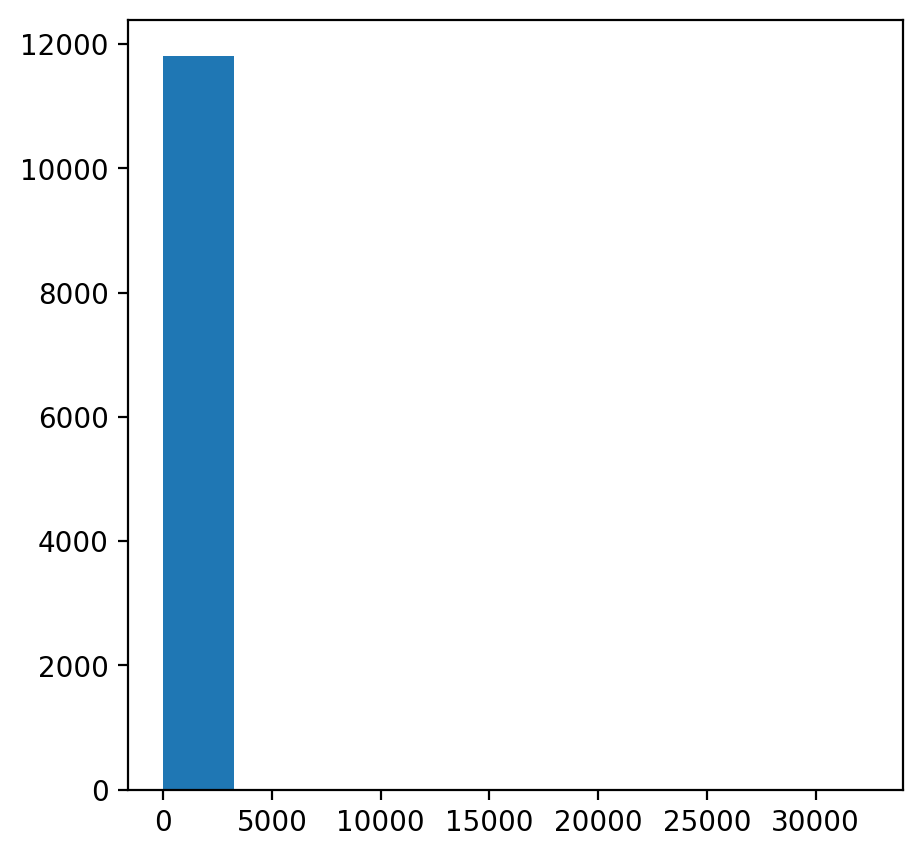

In [ ]:
from collections import Counter

#computing frequency of each note
freq = dict(Counter(notes_))

#library for visualiation
import matplotlib.pyplot as plt

#consider only the frequencies
no=[count for _,count in freq.items()]

#set the figure size
plt.figure(figsize=(5,5))

#plot
plt.hist(no)

In [ ]:
frequent_notes = [note_ for note_, count in freq.items() if count>=50]
print(len(frequent_notes))

1044


In [ ]:
new_music=[]

for notes in notes_array:
    temp=[]
    for note_ in notes:
        if note_ in frequent_notes:
            temp.append(note_)            
    new_music.append(temp)
    
new_music = np.array(new_music)
print(new_music)

[list([])
 list(['86', '88', '88', '89', '89', '88', '88', '84', '84', '81', '81', '86', '86', '86', '86', '84', '84', '81', '81', '77', '77', '79', '79', '81', '81', '79', '79', '76', '76', '77', '77', '81', '81', '84', '84', '79', '79.84', '79', '79.84', '77', '67', '67', '74', '74', '77', '77', '72', '72.76', '72.76', '88', '88', '89', '89', '88', '88', '84', '84', '81', '81', '86', '86', '86', '86', '84', '84', '81', '81', '77', '77', '79', '79', '81', '81', '79', '79', '76', '76', '77', '77', '81', '81', '84', '84', '79', '79.84', '86', '86', '76', '76.81', '79', '79.86', '79.86', '79', '69', '69', '76', '76', '79', '79', '78', '78.86', '78.86', '88', '88', '89', '89', '88', '88', '84', '84', '81', '81', '86', '86', '86', '86', '84', '84', '81', '81', '77', '77', '79', '79', '81', '81', '79', '79', '76', '76', '77', '77', '81', '81', '84', '84', '88', '88', '89', '89', '84', '84', '88', '88', '89', '89', '88', '88', '84', '84', '81', '81', '86', '86', '86', '86', '84', '84', '81',

<ipython-input-149-05d929c3a6cf>:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_music = np.array(new_music)


In [ ]:
no_of_timesteps = 32
x = []
y = []

for note_ in new_music:
    for i in range(0, len(note_) - no_of_timesteps, 1):
        
        #preparing input and output sequences
        input_ = note_[i:i + no_of_timesteps]
        output = note_[i + no_of_timesteps]
        
        x.append(input_)
        y.append(output)
        
x=np.array(x)
y=np.array(y)

In [ ]:
unique_x = list(set(x.ravel()))
x_note_to_int = dict((note_, number) for number, note_ in enumerate(unique_x))
#preparing input sequences
x_seq=[]
for i in x:
    temp=[]
    for j in i:
        #assigning unique integer to every note
        temp.append(x_note_to_int[j])
    x_seq.append(temp)
    
x_seq = np.array(x_seq)

In [ ]:
unique_y = list(set(y))
y_note_to_int = dict((note_, number) for number, note_ in enumerate(unique_y)) 
y_seq=np.array([y_note_to_int[i] for i in y])

In [ ]:
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(x_seq,y_seq,test_size=0.2,random_state=0)

In [ ]:
n_vocab = len(unique_x)
n_vocab

1044

In [ ]:
# sequence_length = 100
# # get all pitch names
# pitchnames = sorted(set(item for item in notes))
# # create a dictionary to map pitches to integers
# note_to_int = dict((note, number) for number, note in enumerate(pitchnames))
# network_input = []
# network_output = []
# # create input sequences and the corresponding outputs
# for i in range(0, len(notes) - sequence_length, 1):
#     sequence_in = notes[i:i + sequence_length]
#     sequence_out = notes[i + sequence_length]
#     network_input.append([note_to_int[char] for char in sequence_in])
#     network_output.append(note_to_int[sequence_out])
# n_patterns = len(network_input)
# # reshape the input into a format compatible with LSTM layers
# network_input = np.reshape(network_input, (n_patterns, sequence_length, 1))
# # normalize input
# network_input = network_input / float(n_vocab)
# network_output = np_utils.to_categorical(network_output)

ValueError: ignored

In [ ]:
from keras.layers import *
from keras.models import *
from keras.callbacks import *
import keras.backend as K

K.clear_session()
model = Sequential()
    
#embedding layer
model.add(Embedding(len(unique_x), 100, input_length=32,trainable=True)) 

model.add(Conv1D(64,3, padding='causal',activation='relu'))
model.add(Dropout(0.4))
model.add(MaxPool1D(2))
    
model.add(Conv1D(128,3,activation='relu',dilation_rate=2,padding='causal'))
model.add(Dropout(0.4))
model.add(MaxPool1D(2))

model.add(Conv1D(256,3,activation='relu',dilation_rate=4,padding='causal'))
model.add(Dropout(0.4))
model.add(MaxPool1D(2))
          
#model.add(Conv1D(256,5,activation='relu'))    
model.add(GlobalMaxPool1D())
    
model.add(Dense(256, activation='relu'))
model.add(Dense(len(unique_y), activation='softmax'))
    
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 32, 100)           104400    
                                                                 
 conv1d (Conv1D)             (None, 32, 64)            19264     
                                                                 
 dropout (Dropout)           (None, 32, 64)            0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 16, 64)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 16, 128)           24704     
                                                                 
 dropout_1 (Dropout)         (None, 16, 128)           0         
                                                        

In [ ]:
mc=ModelCheckpoint('/content/MyDrive/MusicGeneration/best_model_piano_final.h5', monitor='val_loss', mode='min', save_best_only=True,verbose=1)
history = model.fit(np.array(x_tr),np.array(y_tr),batch_size=128,epochs=30, validation_data=(np.array(x_val),np.array(y_val)),verbose=1, callbacks=[mc])

Epoch 1/30
5388/5388 [==============================] - ETA: 0s - loss: 2.8439
Epoch 1: val_loss improved from inf to 2.93928, saving model to /content/MyDrive/MusicGeneration/best_model_piano_final.h5
5388/5388 [==============================] - 43s 8ms/step - loss: 2.8439 - val_loss: 2.9393
Epoch 2/30
5386/5388 [============================>.] - ETA: 0s - loss: 2.6381
Epoch 2: val_loss improved from 2.93928 to 2.64396, saving model to /content/MyDrive/MusicGeneration/best_model_piano_final.h5
5388/5388 [==============================] - 35s 7ms/step - loss: 2.6381 - val_loss: 2.6440
Epoch 3/30
5388/5388 [==============================] - ETA: 0s - loss: 2.5282
Epoch 3: val_loss improved from 2.64396 to 2.47535, saving model to /content/MyDrive/MusicGeneration/best_model_piano_final.h5
5388/5388 [==============================] - 38s 7ms/step - loss: 2.5282 - val_loss: 2.4754
Epoch 4/30
5385/5388 [============================>.] - ETA: 0s - loss: 2.4608
Epoch 4: val_loss improved from

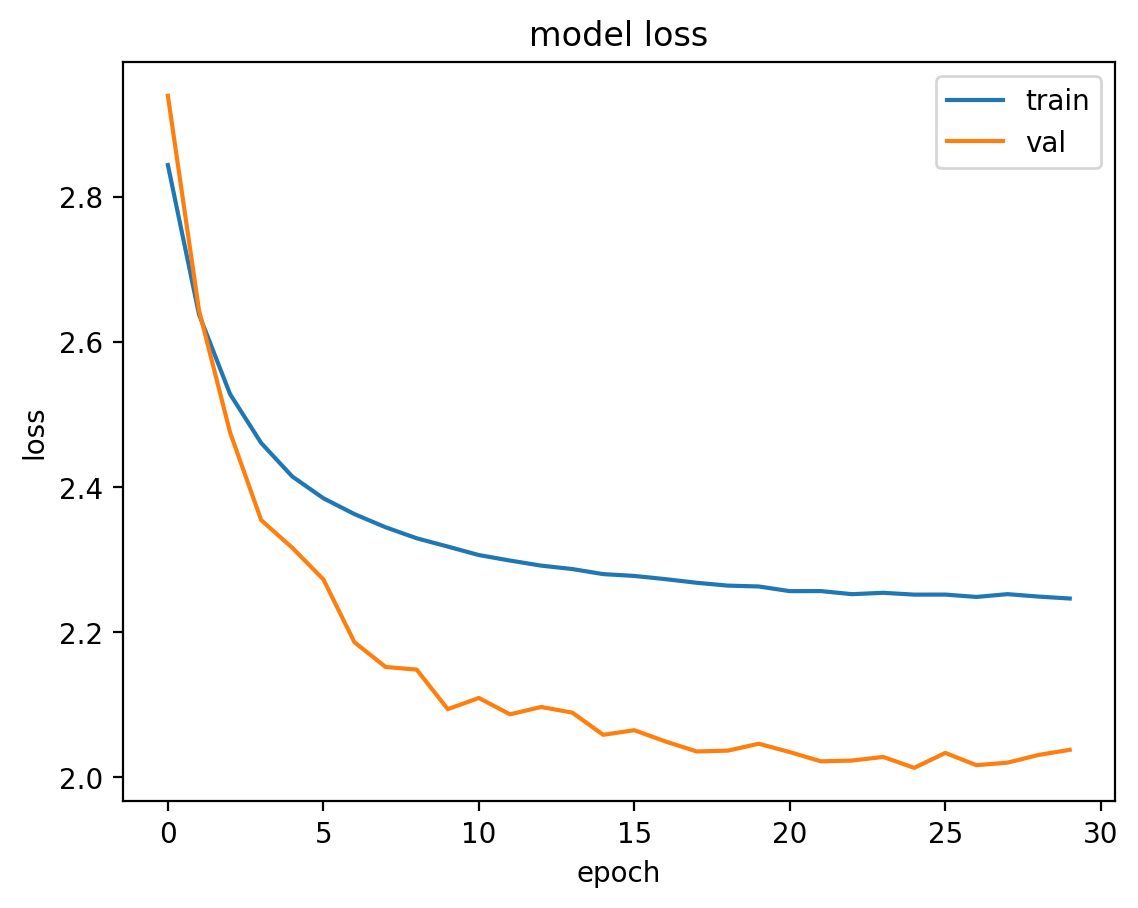

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [ ]:
#loading best model
from keras.models import load_model
model = load_model('/content/MyDrive/MusicGeneration/best_model_piano_final.h5')

In [ ]:
# model.load_weights('/content/MyDrive/MusicGeneration/best_model_piano.h5')

In [ ]:
# mc=ModelCheckpoint('/content/MyDrive/MusicGeneration/best_model_piano2.h5', monitor='val_loss', mode='min', save_best_only=True,verbose=1)
# history = model.fit(np.array(x_tr),np.array(y_tr),batch_size=128,initial_epoch=30,epochs=60, validation_data=(np.array(x_val),np.array(y_val)),verbose=1, callbacks=[mc])

In [ ]:
import random
ind = np.random.randint(0,len(x_val)-1)

random_music = x_val[ind]
print(random_music)

predictions=[]
for i in range(80):

    random_music = random_music.reshape(1,no_of_timesteps)

    prob = model.predict(random_music)[0]
    # y_pred = np.argmax(prob,axis=0)
    # print(np.argsort(prob))
    y_pred = np.argsort(prob)[-np.random.randint(1, 5)]
    print(y_pred)

    predictions.append(y_pred)

    random_music = np.insert(random_music[0],len(random_music[0]),y_pred)
    random_music = random_music[1:]
    
print(predictions)

[ 63 189 189  63  63 465 465  63 622 622 124 164 164 288 288 189 189 288
 288 738 738 738 738 288 288 738 738 918 918 918 918  50]
1/1 [==============================] - 0s 20ms/step
591
1/1 [==============================] - 0s 19ms/step
50
1/1 [==============================] - 0s 21ms/step
124
1/1 [==============================] - 0s 22ms/step
124
1/1 [==============================] - 0s 23ms/step
50
1/1 [==============================] - 0s 22ms/step
591
1/1 [==============================] - 0s 25ms/step
288
1/1 [==============================] - 0s 20ms/step
50
1/1 [==============================] - 0s 19ms/step
288
1/1 [==============================] - 0s 22ms/step
673
1/1 [==============================] - 0s 21ms/step
510
1/1 [==============================] - 0s 18ms/step
124
1/1 [==============================] - 0s 19ms/step
288
1/1 [==============================] - 0s 19ms/step
288
1/1 [==============================] - 0s 28ms/step
50
1/1 [============================

In [ ]:
x_int_to_note = dict((number, note_) for number, note_ in enumerate(unique_x)) 
predicted_notes = [x_int_to_note[i] for i in predictions]

In [ ]:
def convert_to_midi(prediction_output):
   
    offset = 0
    output_notes = []

    # create note and chord objects based on the values generated by the model
    for pattern in prediction_output:
        
        # pattern is a chord
        if ('.' in pattern) or pattern.isdigit():
            notes_in_chord = pattern.split('.')
            notes = []
            for current_note in notes_in_chord:
                
                cn=int(current_note)
                new_note = note.Note(cn)
                new_note.storedInstrument = instrument.Piano()
                notes.append(new_note)
                
            new_chord = chord.Chord(notes)
            new_chord.offset = offset
            output_notes.append(new_chord)
            
        # pattern is a note
        else:
            
            new_note = note.Note(pattern)
            new_note.offset = offset
            new_note.storedInstrument = instrument.Piano()
            output_notes.append(new_note)

        # increase offset each iteration so that notes do not stack
        offset += 1
    midi_stream = stream.Stream(output_notes)
    midi_stream.write('midi', fp='music.mid')

In [ ]:
convert_to_midi(predicted_notes)